
Summary Statistics for ADANIPORTS.csv:
             Close        Volume         VWAP
count  3322.000000  3.322000e+03  3322.000000
mean    344.201626  2.954564e+06   344.853182
std     193.045886  4.104227e+06   193.841305
min     108.000000  1.236600e+04   108.340000
25%     164.312500  7.493682e+05   164.855000
50%     324.700000  2.007292e+06   325.765000
75%     400.912500  3.636883e+06   400.607500
max    1307.450000  9.771788e+07  1302.150000


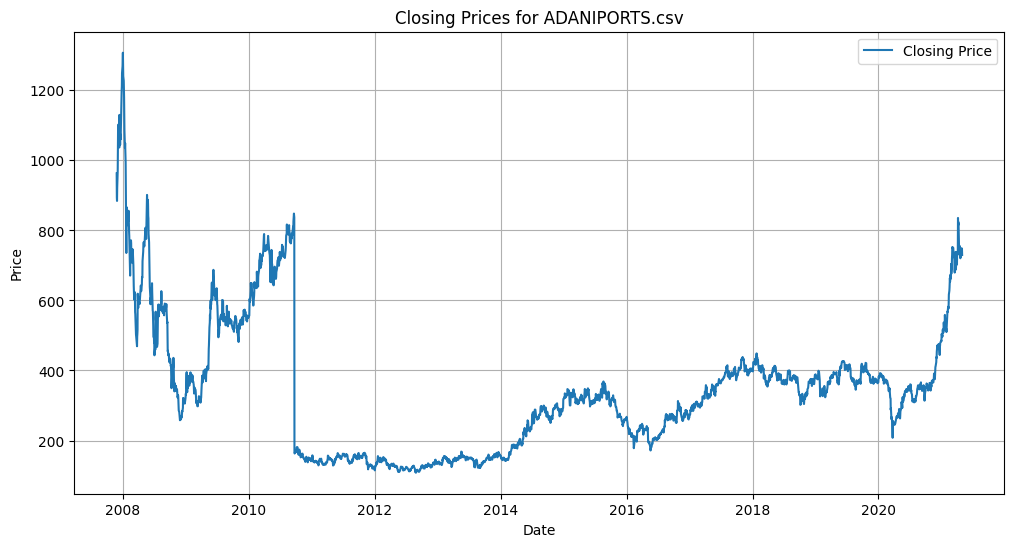

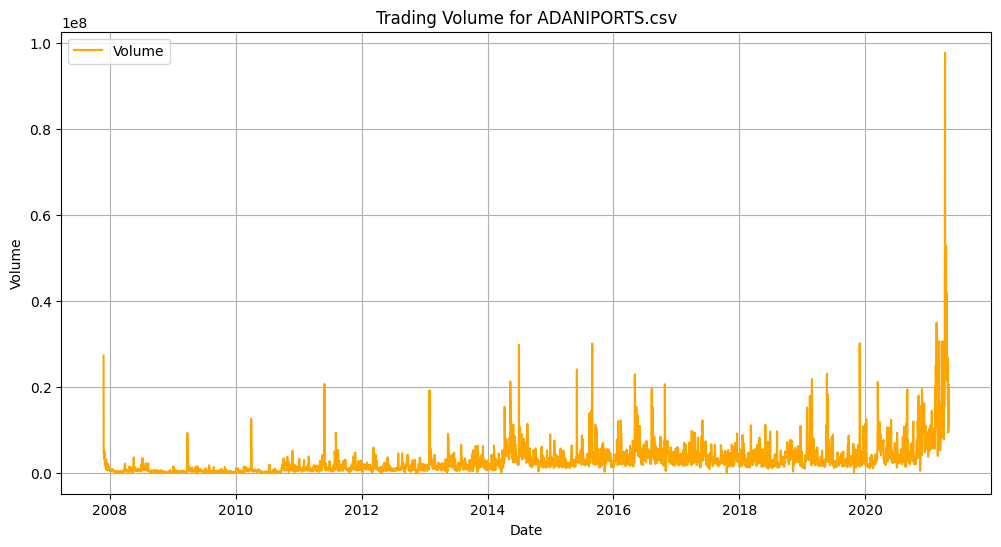

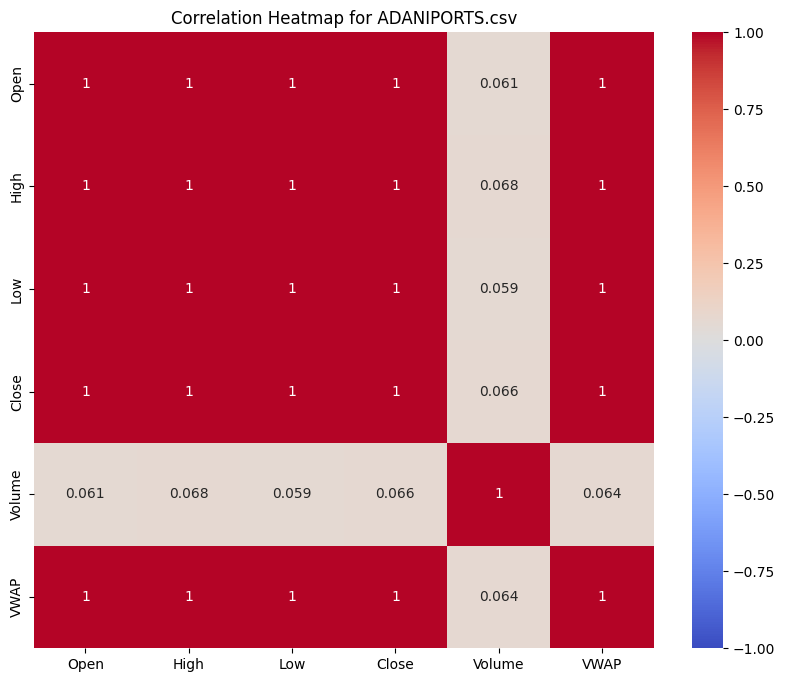

In [1]:
# src/eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data for a specific stock
def load_stock_data(stock_file, data_dir="../data/"):
    file_path = os.path.join(data_dir, stock_file)
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return None
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Basic EDA
def perform_eda(stock_file):
    df = load_stock_data(stock_file)
    if df is None:
        return

    # Set date as index
    df.set_index('Date', inplace=True)

    # Summary statistics
    print(f"\nSummary Statistics for {stock_file}:")
    print(df[['Close', 'Volume', 'VWAP']].describe())

    # Plot closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Closing Price')
    plt.title(f'Closing Prices for {stock_file}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Volume', color='orange')
    plt.title(f'Trading Volume for {stock_file}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for {stock_file}')
    plt.show()

# Run EDA for a sample stock
if __name__ == "__main__":
    stock_file = "ADANIPORTS.csv"  # Example stock
    perform_eda(stock_file)

# Break

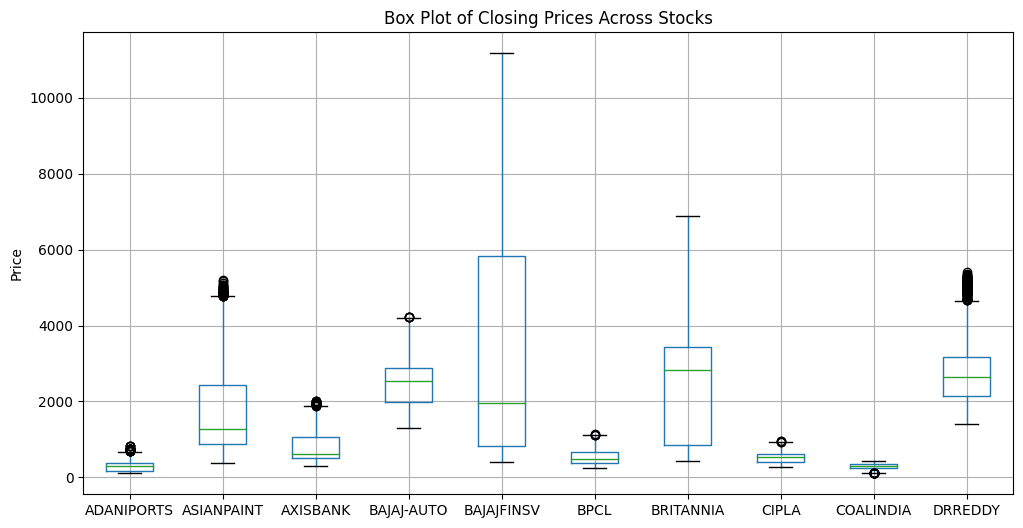


Missing Values in ADANIPORTS.csv:
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Daily_Return          0
Volatility            0
dtype: int64

Missing Values in ASIANPAINT.csv:
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

Missing Values in AXISBANK.csv:
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last   

<Figure size 1200x600 with 0 Axes>

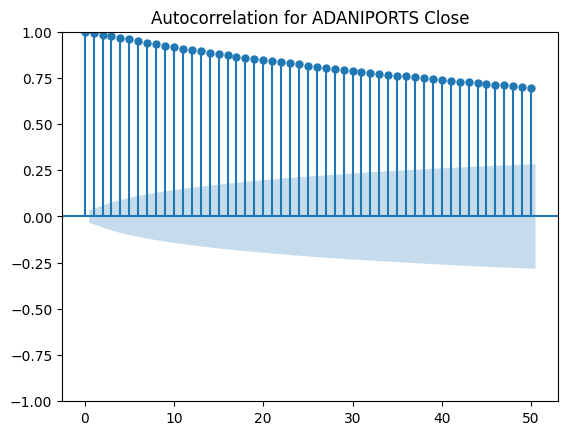

ADF Statistic: -4.777085111301348
p-value: 6.0149572107930606e-05
Critical Values: {'1%': -3.432334353260866, '5%': -2.8624167700089744, '10%': -2.5672367227799637}


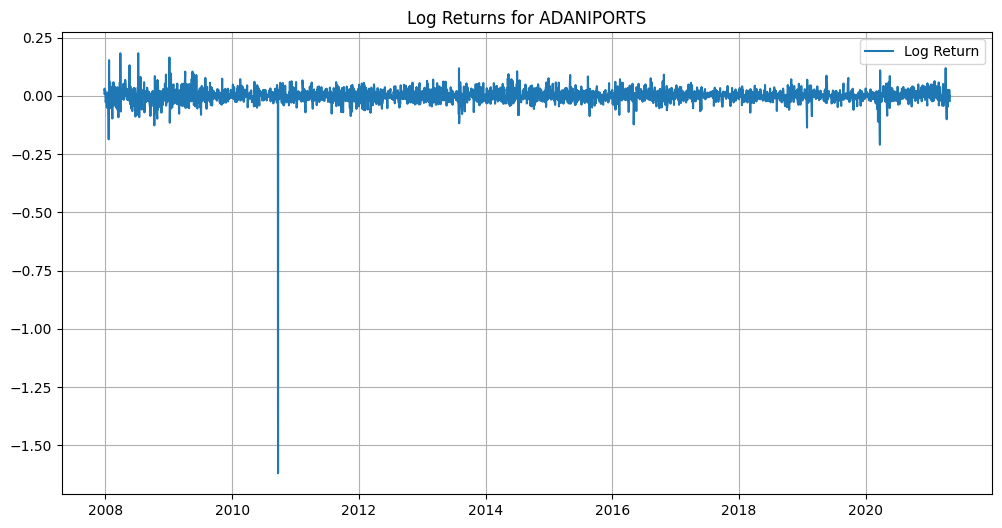

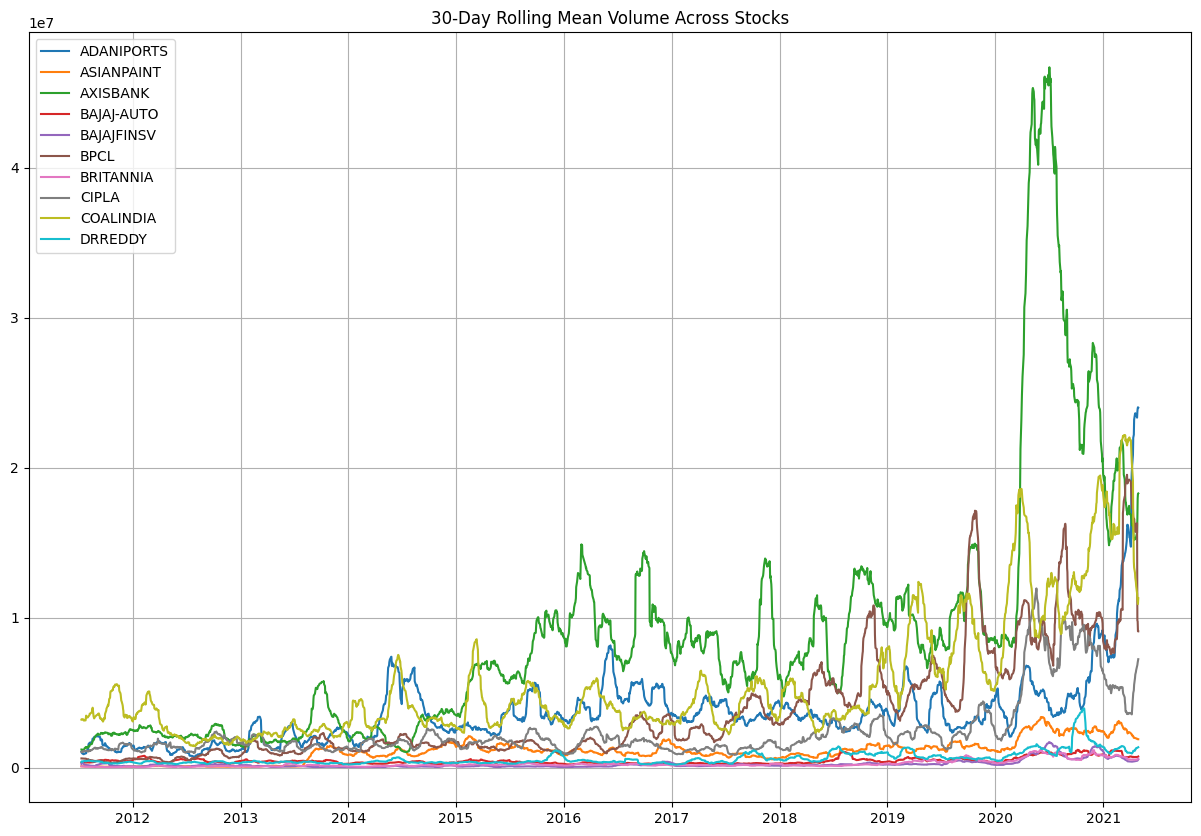

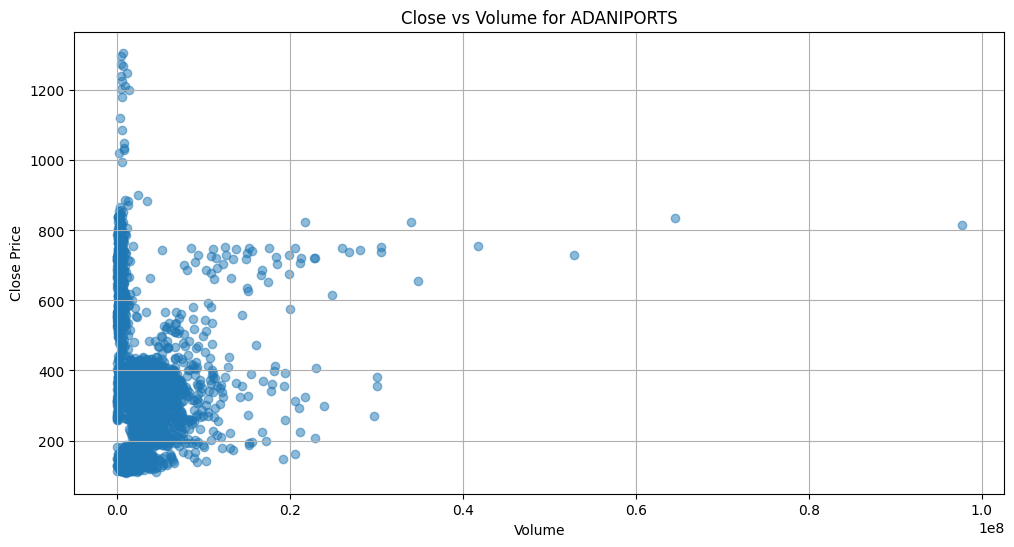

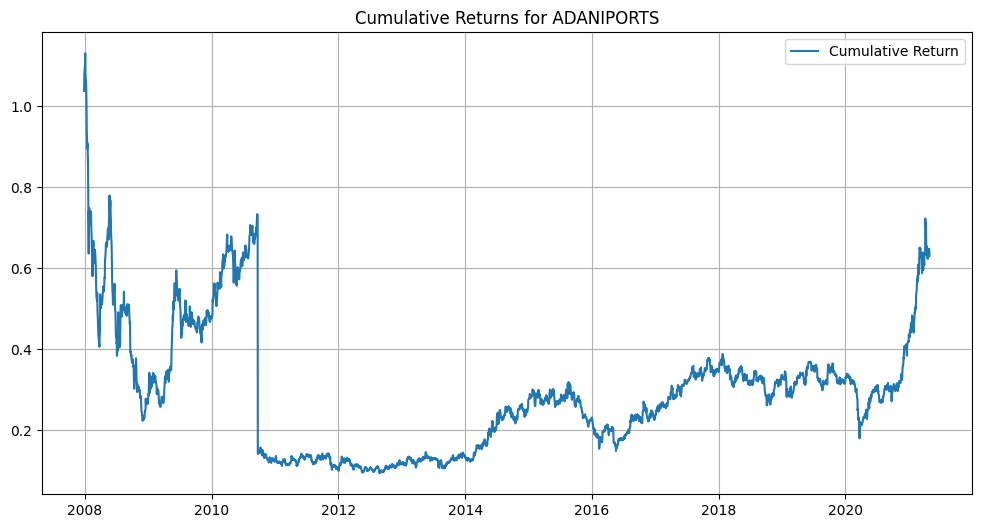

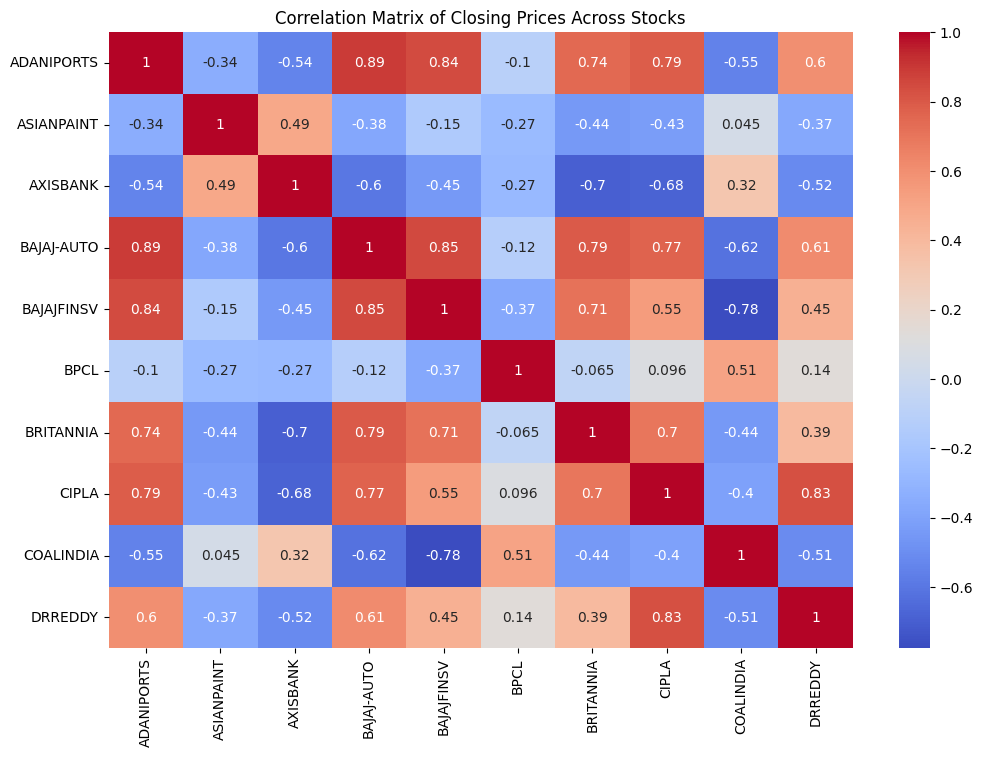

EDA results saved for all stocks.


In [ ]:

# Cell 16: Check for Missing Values




# Cell 20: Log Returns for ADANIPORTS
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
# Use index aligned with Log_Return (drop first row)
plt.figure(figsize=(12, 6))
plt.plot(df.index[1:], df['Log_Return'].dropna(), label='Log Return')
plt.title('Log Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 21: Compare Volume Trends Across Stocks
plt.figure(figsize=(15, 10))
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        plt.plot(stock_df.index, stock_df['Volume'].rolling(window=30).mean(), label=stock.replace('.csv', ''))
plt.title('30-Day Rolling Mean Volume Across Stocks')
plt.legend()
plt.grid()
plt.show()

# Cell 22: Scatter Plot of Close vs Volume for ADANIPORTS
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Close vs Volume for ADANIPORTS')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# Cell 23: Cumulative Returns for ADANIPORTS
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 24: Correlation Matrix Across All Stocks
close_prices = pd.DataFrame({stock.replace('.csv', ''): stock_df['Close'] for stock, stock_df in data_dict.items() if stock_df is not None})
plt.figure(figsize=(12, 8))
sns.heatmap(close_prices.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Closing Prices Across Stocks')
plt.show()

# Cell 25: Save EDA Results
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        stock_df.to_csv(f"../data/eda_{stock}")
print("EDA results saved for all stocks.")

In [ ]:
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nMissing Values in {stock}:")
        print(df.isnull().sum())


Missing Values in ADANIPORTS.csv:
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
Daily_Return            1
Volatility             19
dtype: int64

Missing Values in ASIANPAINT.csv:
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

Missing Values in AXISBANK.csv:
Symbol                   0
Series                   0
Prev Close             

In [ ]:
# Fill or Drop Missing Values
for stock, df in data_dict.items():
    if df is not None:
        df.fillna(method='ffill', inplace=True)
        df.dropna(inplace=True)
        print(f"{stock} - Rows after cleaning: {len(df)}")

ADANIPORTS.csv - Rows after cleaning: 2456
ASIANPAINT.csv - Rows after cleaning: 2456
AXISBANK.csv - Rows after cleaning: 2456
BAJAJ-AUTO.csv - Rows after cleaning: 2456
BAJAJFINSV.csv - Rows after cleaning: 2456
BPCL.csv - Rows after cleaning: 2456
BRITANNIA.csv - Rows after cleaning: 2456
CIPLA.csv - Rows after cleaning: 2456
COALINDIA.csv - Rows after cleaning: 2456
DRREDDY.csv - Rows after cleaning: 2456


In [ ]:
## Autocorrelation Plot for ADANIPORTS Close

<Figure size 1200x600 with 0 Axes>

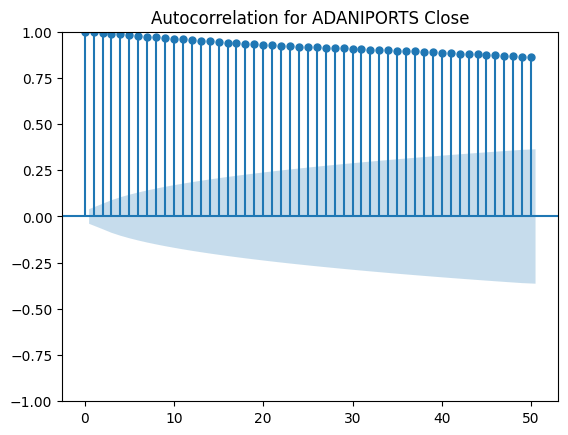

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df['Close'].dropna(), lags=50)
plt.title('Autocorrelation for ADANIPORTS Close')
plt.show()

## Stationarity Test (ADF Test) for ADANIPORTS

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.24337273718540947
p-value: 0.9331503448953536
Critical Values: {'1%': -3.4330461396142007, '5%': -2.8627311246351157, '10%': -2.5674040843983836}


ADANIPORTS.csv - Rows: 3322, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
ASIANPAINT.csv - Rows: 5306, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
AXISBANK.csv - Rows: 5306, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BAJAJ-AUTO.csv - Rows: 3202, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BAJAJFINSV.csv - Rows: 3201, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BPCL.csv - Rows: 5306, Columns: ['Symbol', 'Series',

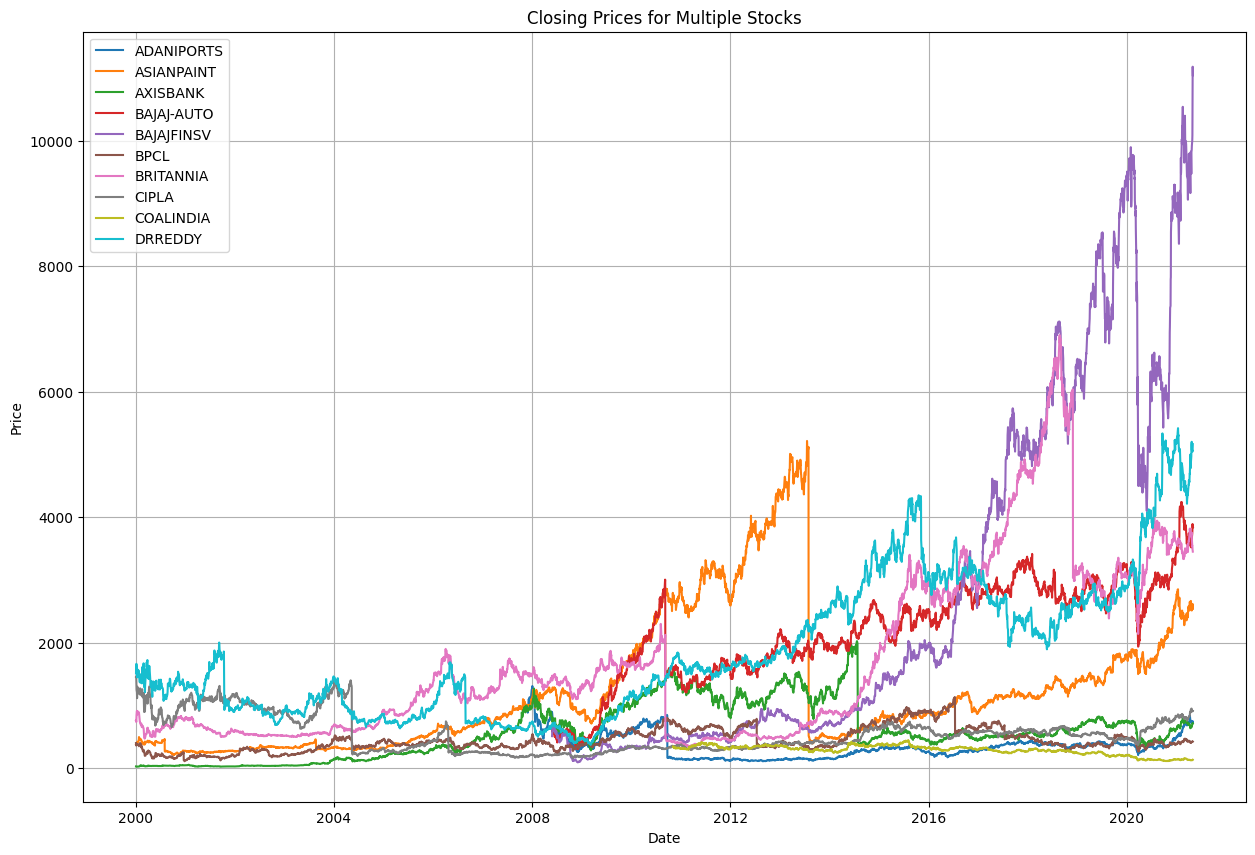

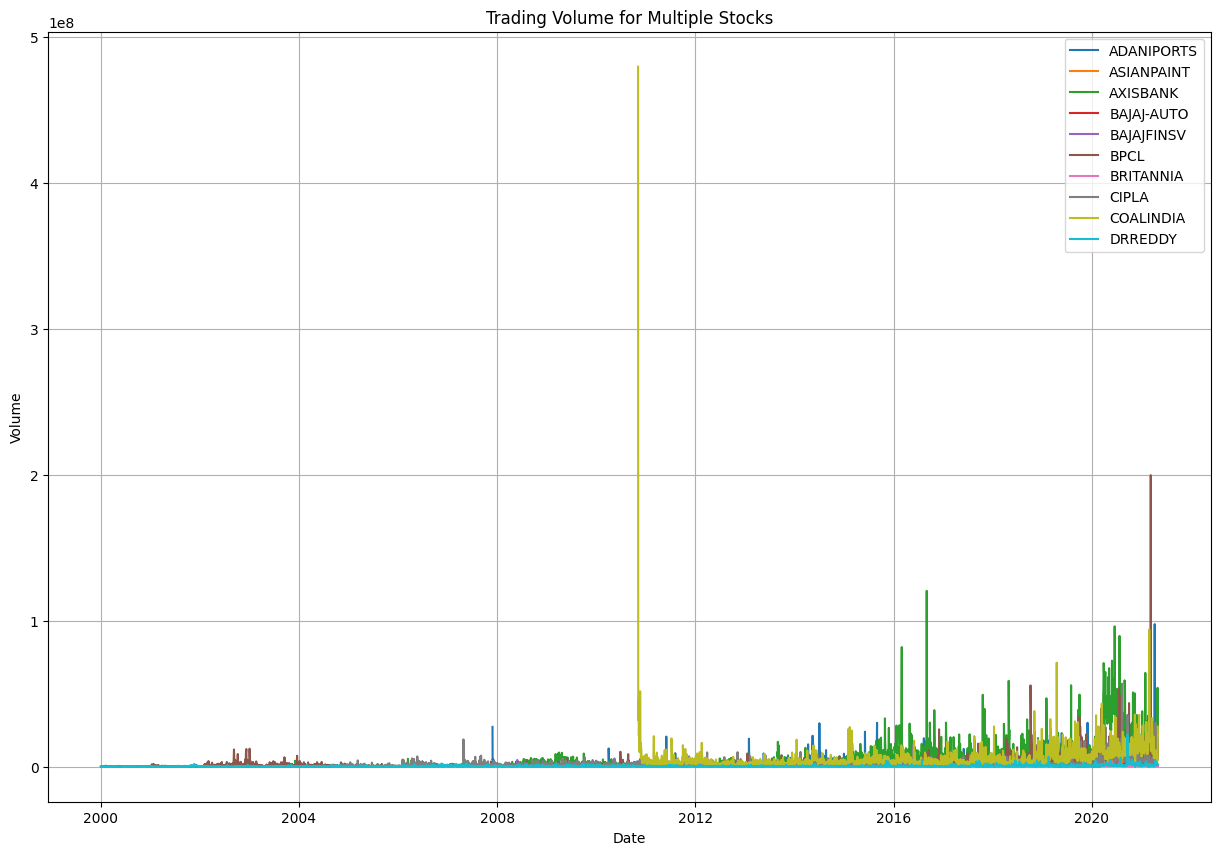

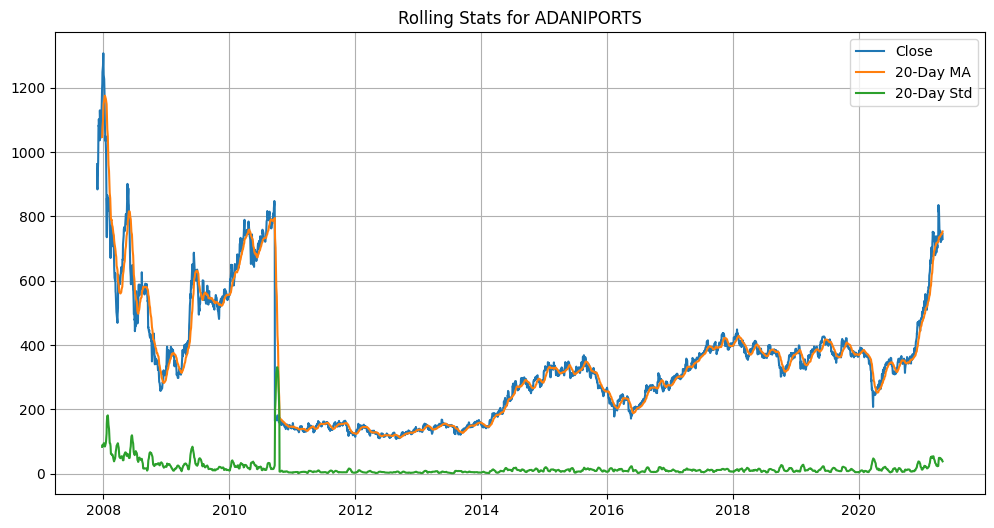

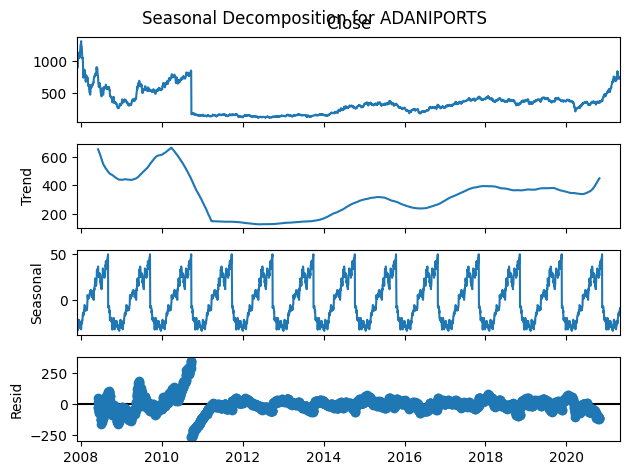

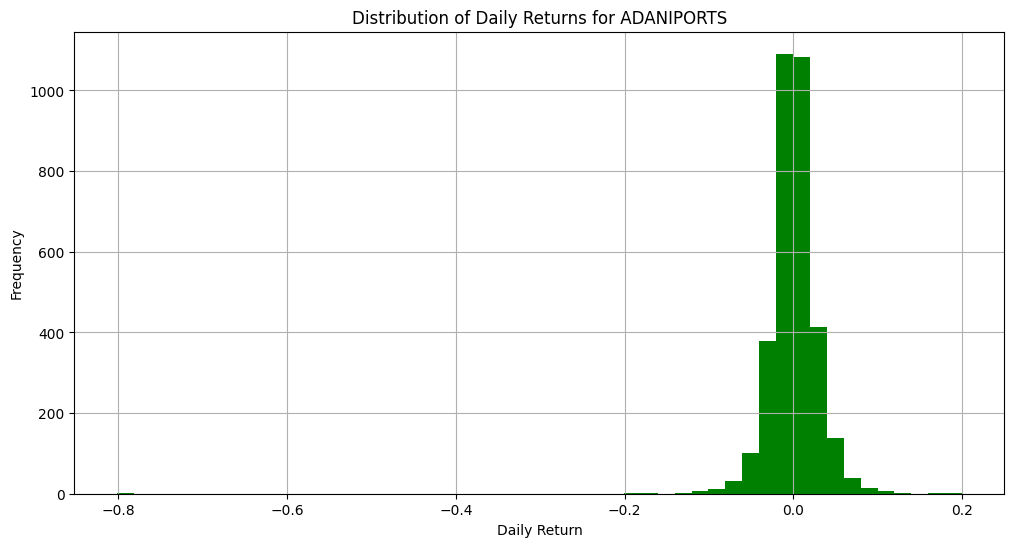

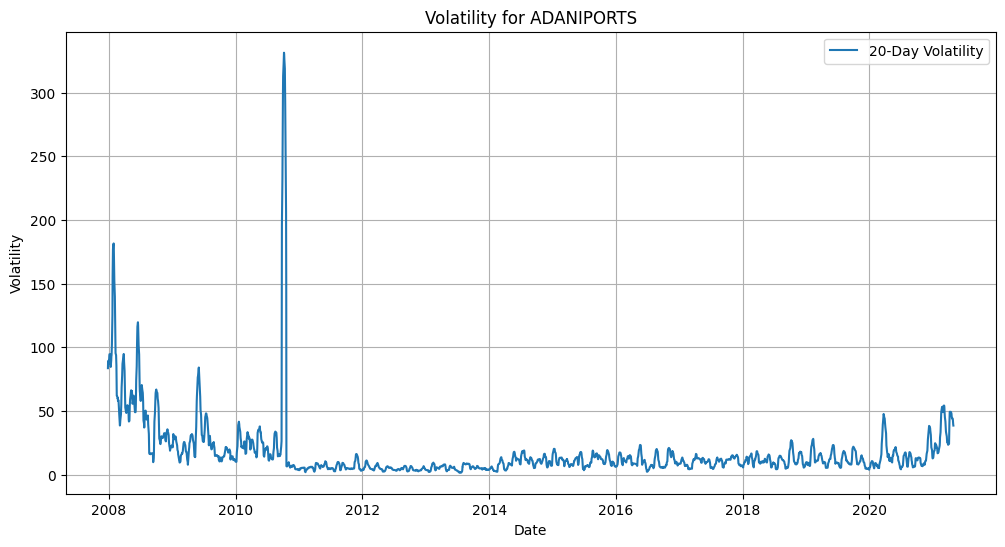

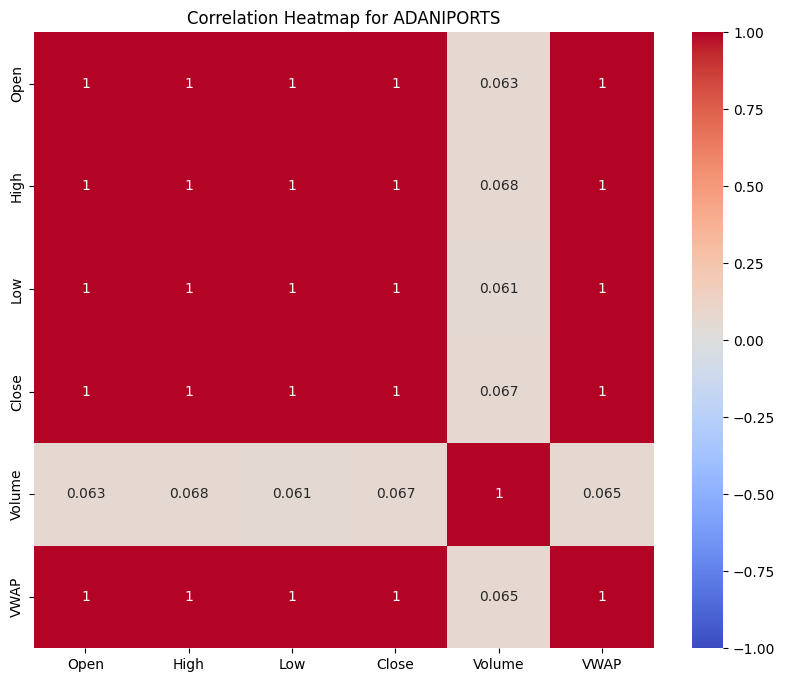

/home/joshi/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


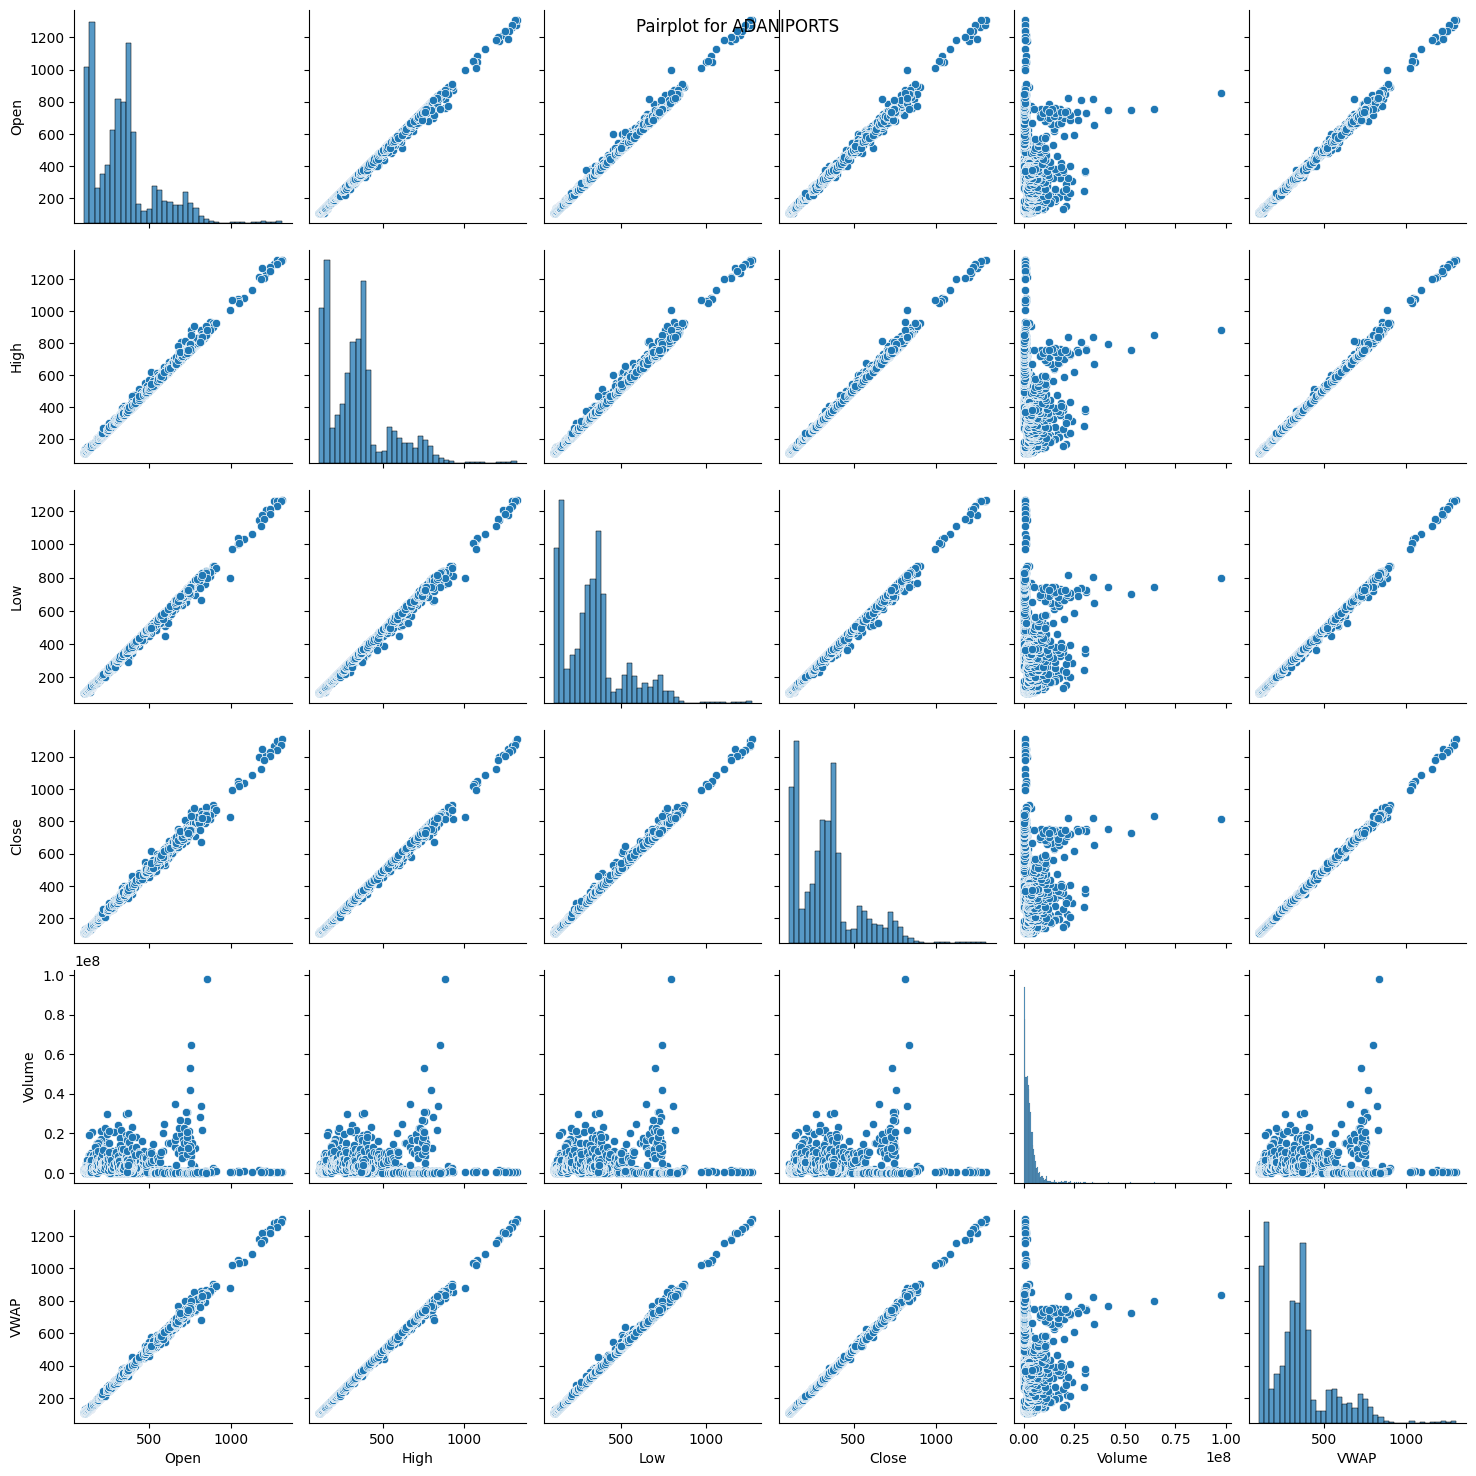

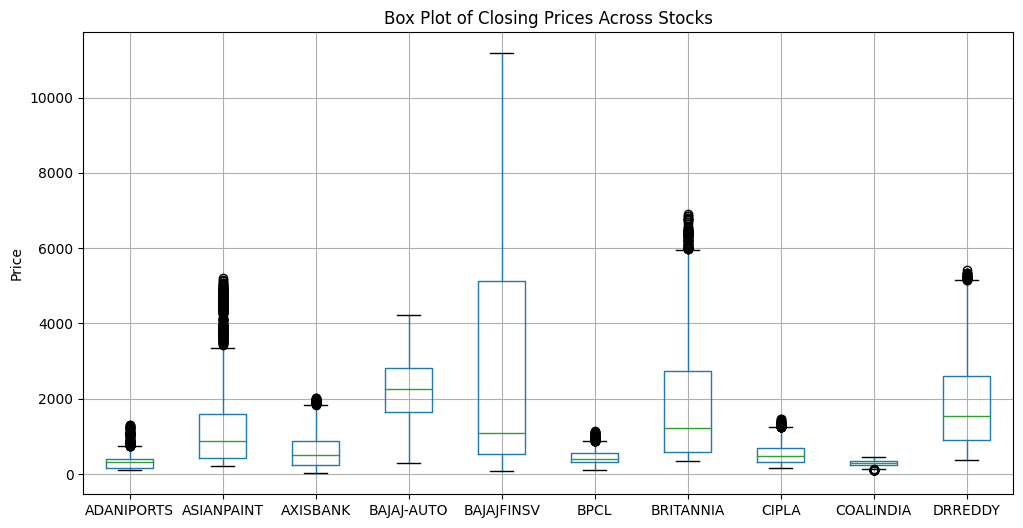


Missing Values in ADANIPORTS.csv:
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
Daily_Return            1
Volatility             19
dtype: int64

Missing Values in ASIANPAINT.csv:
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

Missing Values in AXISBANK.csv:
Symbol                   0
Series                   0
Prev Close             

<Figure size 1200x600 with 0 Axes>

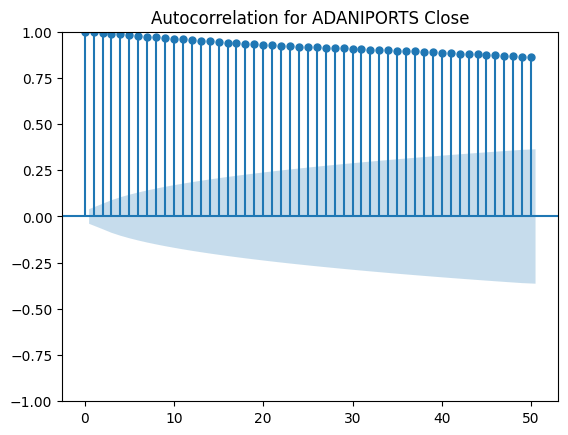

ADF Statistic: -0.24337273718540947
p-value: 0.9331503448953536
Critical Values: {'1%': -3.4330461396142007, '5%': -2.8627311246351157, '10%': -2.5674040843983836}


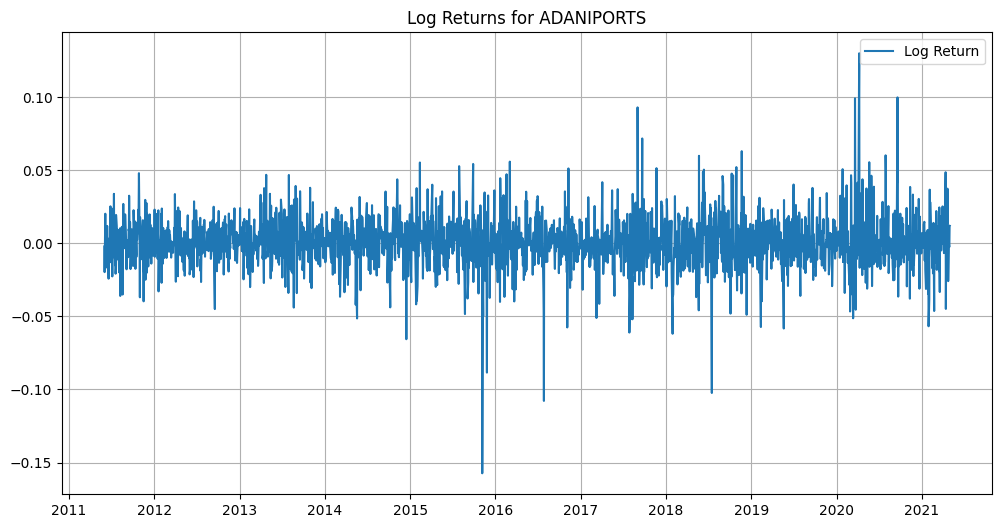

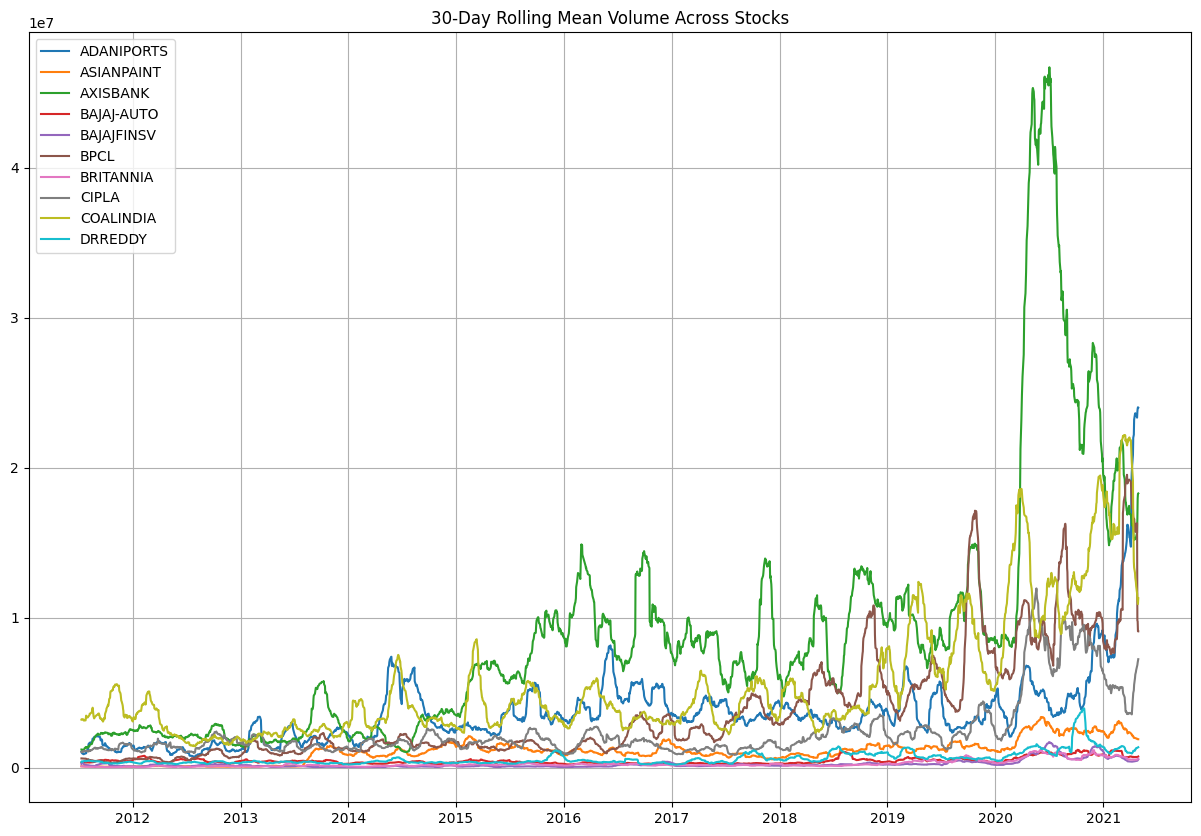

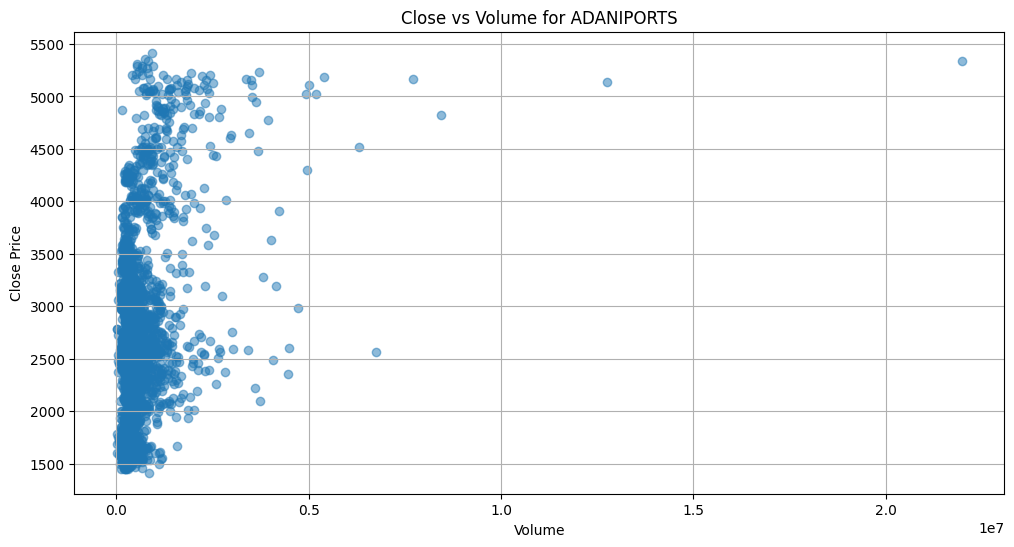

KeyError: 'Daily_Return'

In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Cell 2: Define Stock List for Analysis
stocks = ["ADANIPORTS.csv", "ASIANPAINT.csv", "AXISBANK.csv", "BAJAJ-AUTO.csv", 
          "BAJAJFINSV.csv", "BPCL.csv", "BRITANNIA.csv", "CIPLA.csv", 
          "COALINDIA.csv", "DRREDDY.csv"]
data_dir = "../data/"

# Cell 3: Load Data Function
def load_stock_data(stock_file, data_dir="../data/"):
    file_path = os.path.join(data_dir, stock_file)
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return None
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Cell 4: Load All Stocks into a Dictionary
data_dict = {stock: load_stock_data(stock) for stock in stocks}
for stock, df in data_dict.items():
    if df is not None:
        df.set_index('Date', inplace=True)

# Cell 5: Check Loaded Data
for stock, df in data_dict.items():
    if df is not None:
        print(f"{stock} - Rows: {len(df)}, Columns: {df.columns.tolist()}")

# Cell 6: Summary Statistics for All Stocks
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nSummary Statistics for {stock}:")
        print(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].describe())

# Cell 7: Plot Closing Prices for All Stocks
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Close'], label=stock.replace('.csv', ''))
plt.title('Closing Prices for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Cell 8: Plot Trading Volume for All Stocks
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Volume'], label=stock.replace('.csv', ''))
plt.title('Trading Volume for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

# Cell 9: Rolling Mean and Standard Deviation for ADANIPORTS
df = data_dict['ADANIPORTS.csv']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Close'].rolling(window=20).mean(), label='20-Day MA')
# Initialize Volatility after the first 19 rows to avoid NaN
volatility = df['Close'].rolling(window=20).std().iloc[19:]
plt.plot(df.index[19:], volatility, label='20-Day Std')
plt.title('Rolling Stats for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 10: Seasonal Decomposition for ADANIPORTS
result = seasonal_decompose(df['Close'], model='additive', period=252)
result.plot()
plt.suptitle('Seasonal Decomposition for ADANIPORTS')
plt.show()

# Cell 11: Daily Returns for ADANIPORTS
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='green')
plt.title('Distribution of Daily Returns for ADANIPORTS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Cell 12: Volatility (Rolling Standard Deviation) for ADANIPORTS
df['Volatility'] = df['Close'].rolling(window=20).std()
# Drop the first 19 rows where Volatility is NaN
df = df.iloc[19:].copy()  # Use copy to avoid SettingWithCopyWarning
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='20-Day Volatility')
plt.title('Volatility for ADANIPORTS')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

# Cell 13: Correlation Heatmap for ADANIPORTS
plt.figure(figsize=(10, 8))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for ADANIPORTS')
plt.show()

# Cell 14: Pairplot for ADANIPORTS
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].dropna())
plt.suptitle('Pairplot for ADANIPORTS')
plt.show()

# Cell 15: Box Plot of Closing Prices Across Stocks
closing_prices = pd.DataFrame({stock.replace('.csv', ''): df['Close'] for stock, df in data_dict.items() if df is not None})
plt.figure(figsize=(12, 6))
closing_prices.boxplot()
plt.title('Box Plot of Closing Prices Across Stocks')
plt.ylabel('Price')
plt.show()

# Cell 16: Check for Missing Values
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nMissing Values in {stock}:")
        print(df.isnull().sum())

# Cell 17: Fill or Drop Missing Values (if any)
for stock, df in data_dict.items():
    if df is not None:
        # Fill forward and then drop any remaining NaNs
        df.fillna(method='ffill', inplace=True)
        df.dropna(inplace=True)
        print(f"{stock} - Rows after cleaning: {len(df)}")

# Cell 18: Autocorrelation Plot for ADANIPORTS Close
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df['Close'].dropna(), lags=50)
plt.title('Autocorrelation for ADANIPORTS Close')
plt.show()

# Cell 19: Stationarity Test (ADF Test) for ADANIPORTS
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Cell 20: Log Returns for ADANIPORTS
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
# Use index aligned with Log_Return (drop first row)
plt.figure(figsize=(12, 6))
plt.plot(df.index[1:], df['Log_Return'].dropna(), label='Log Return')
plt.title('Log Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 21: Compare Volume Trends Across Stocks
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Volume'].rolling(window=30).mean(), label=stock.replace('.csv', ''))
plt.title('30-Day Rolling Mean Volume Across Stocks')
plt.legend()
plt.grid()
plt.show()

# Cell 22: Scatter Plot of Close vs Volume for ADANIPORTS
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Close vs Volume for ADANIPORTS')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# Cell 23: Cumulative Returns for ADANIPORTS
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 24: Correlation Matrix Across All Stocks
close_prices = pd.DataFrame({stock.replace('.csv', ''): df['Close'] for stock, df in data_dict.items() if df is not None})
plt.figure(figsize=(12, 8))
sns.heatmap(close_prices.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Closing Prices Across Stocks')
plt.show()

# Cell 25: Save EDA Results
for stock, df in data_dict.items():
    if df is not None:
        df.to_csv(f"../data/eda_{stock}")
print("EDA results saved for all stocks.")

ADANIPORTS.csv - Rows: 3322, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
ASIANPAINT.csv - Rows: 5306, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
AXISBANK.csv - Rows: 5306, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BAJAJ-AUTO.csv - Rows: 3202, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BAJAJFINSV.csv - Rows: 3201, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BPCL.csv - Rows: 5306, Columns: ['Symbol', 'Series',

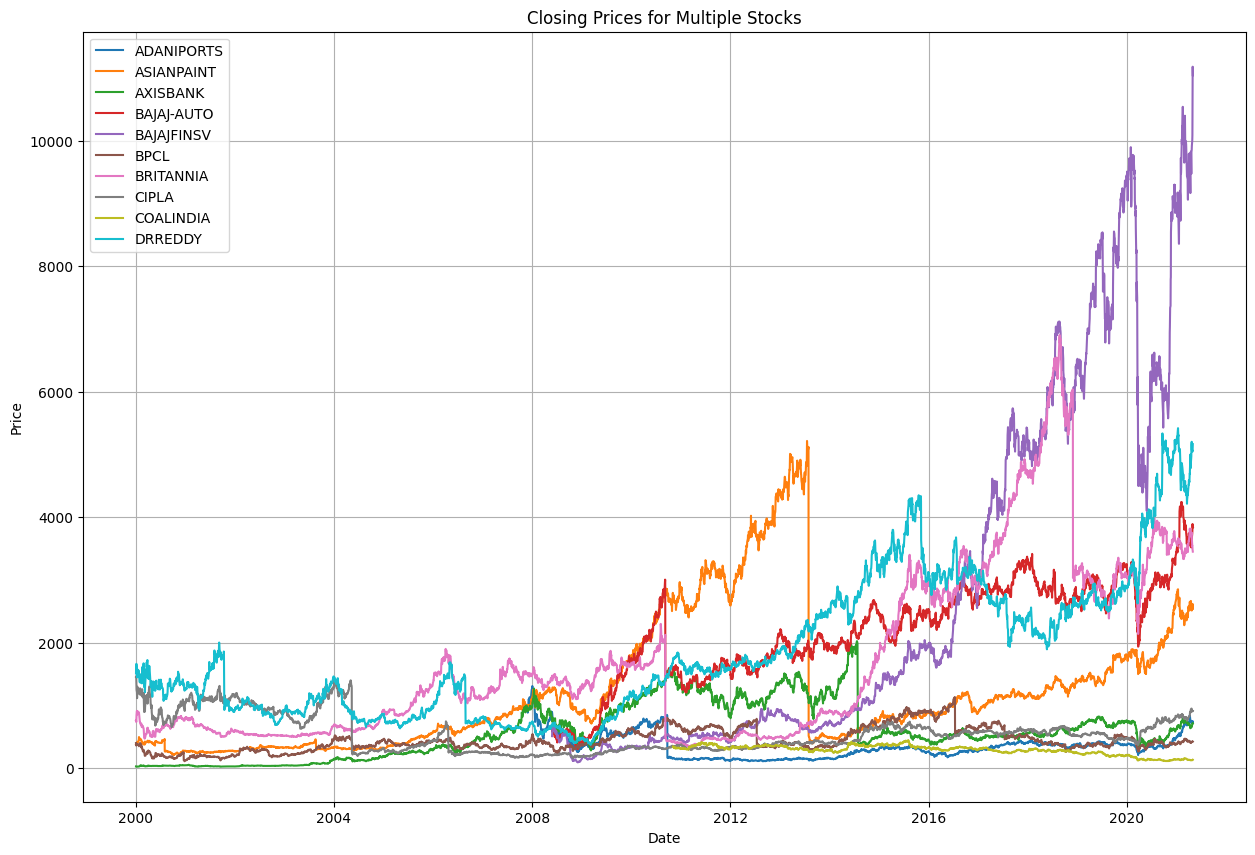

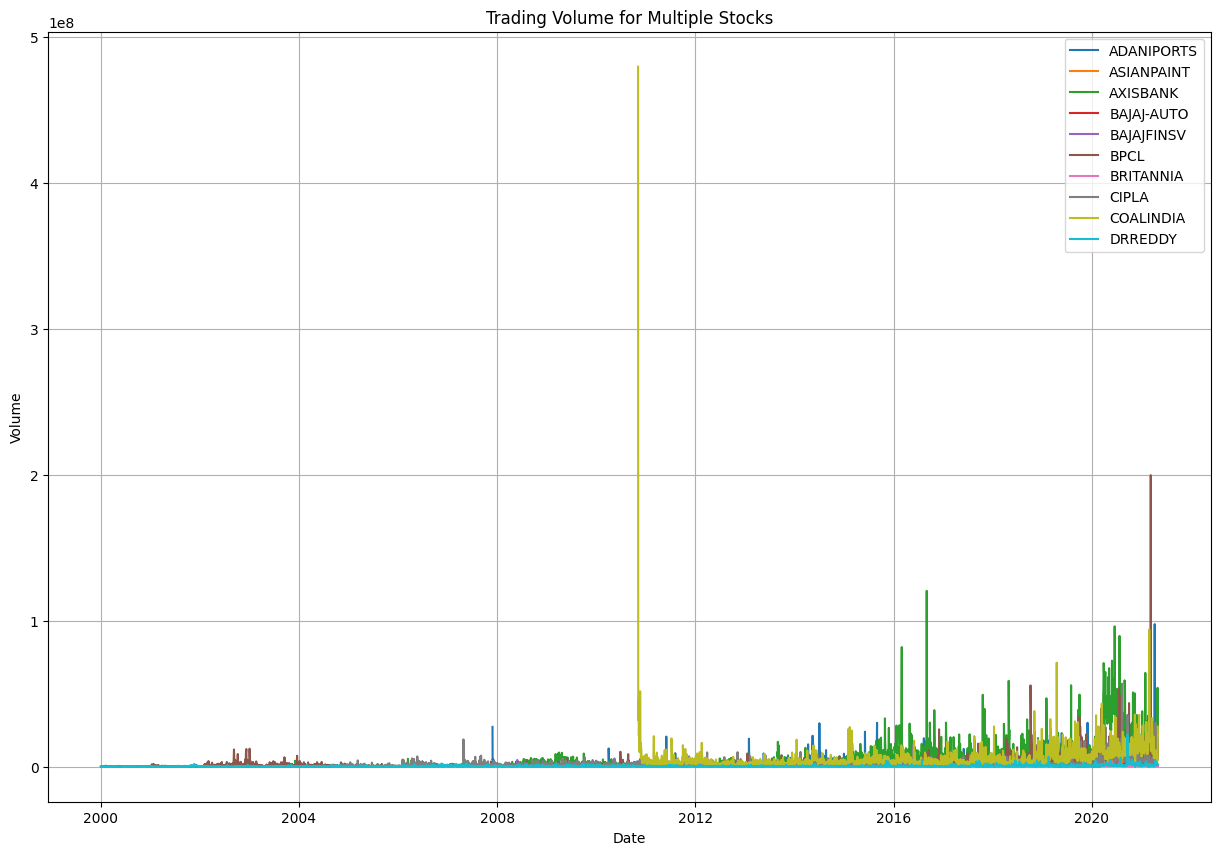

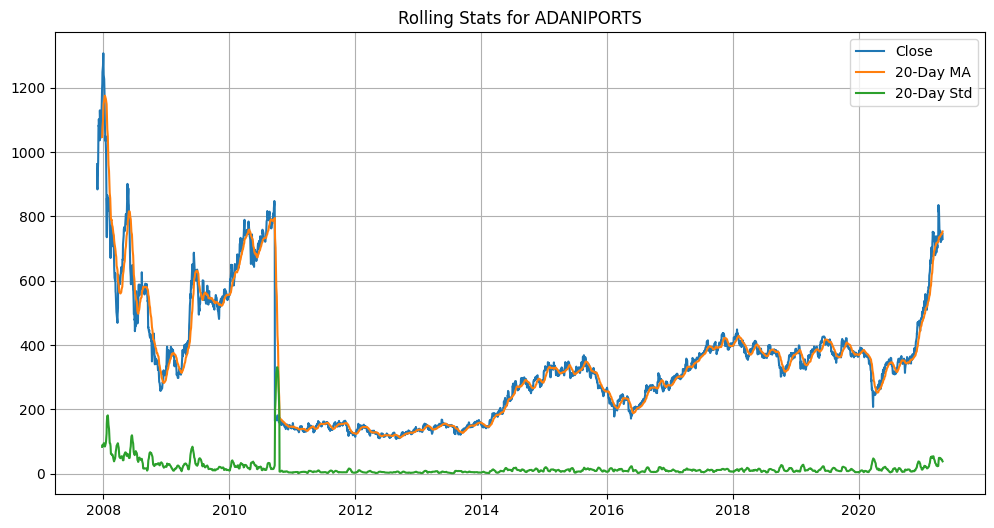

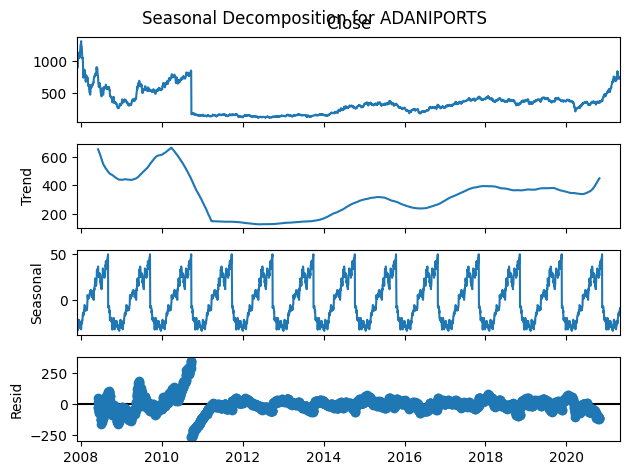

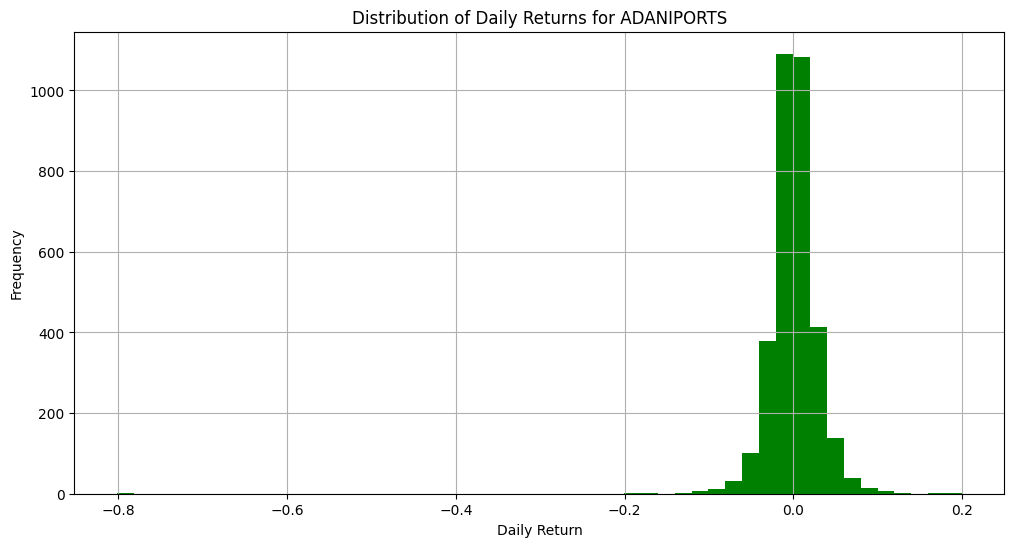

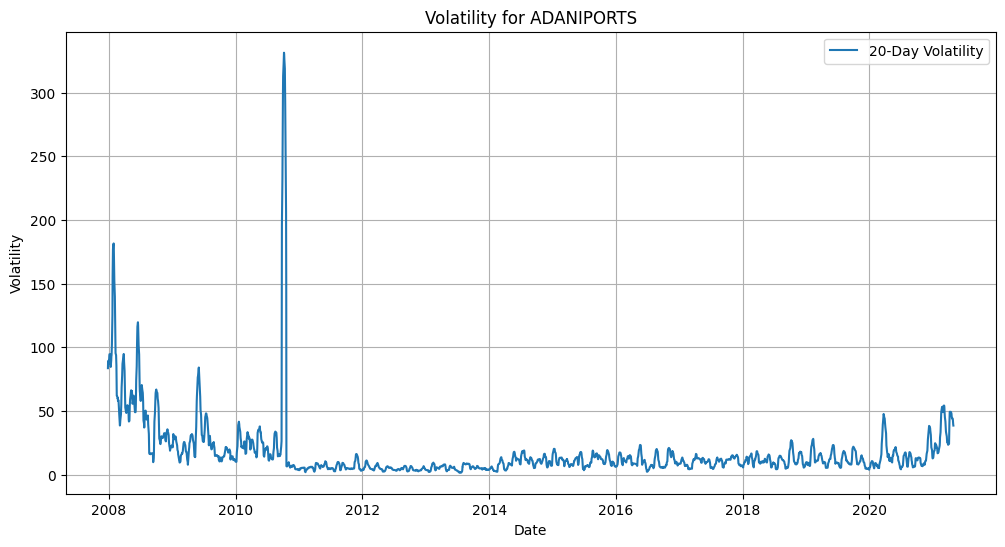

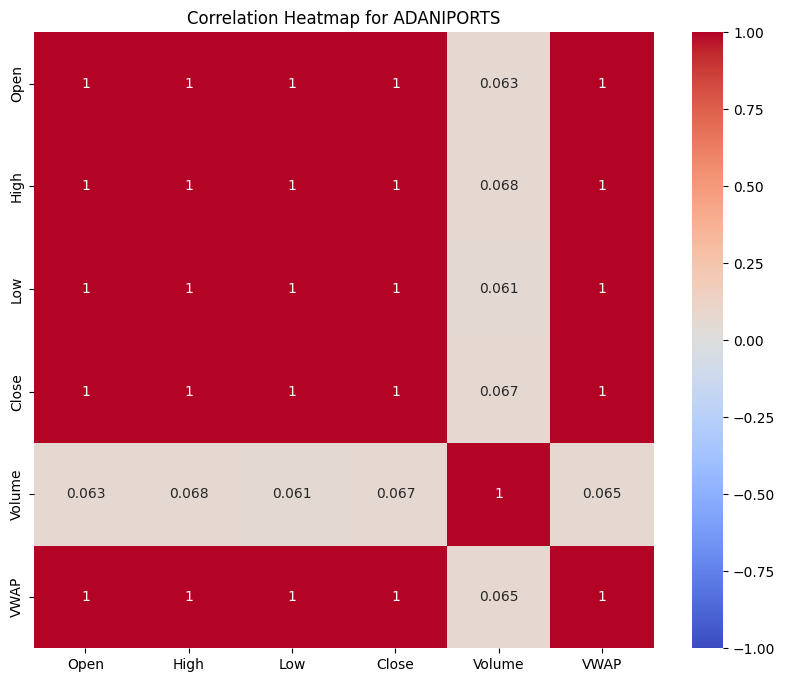

/home/joshi/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


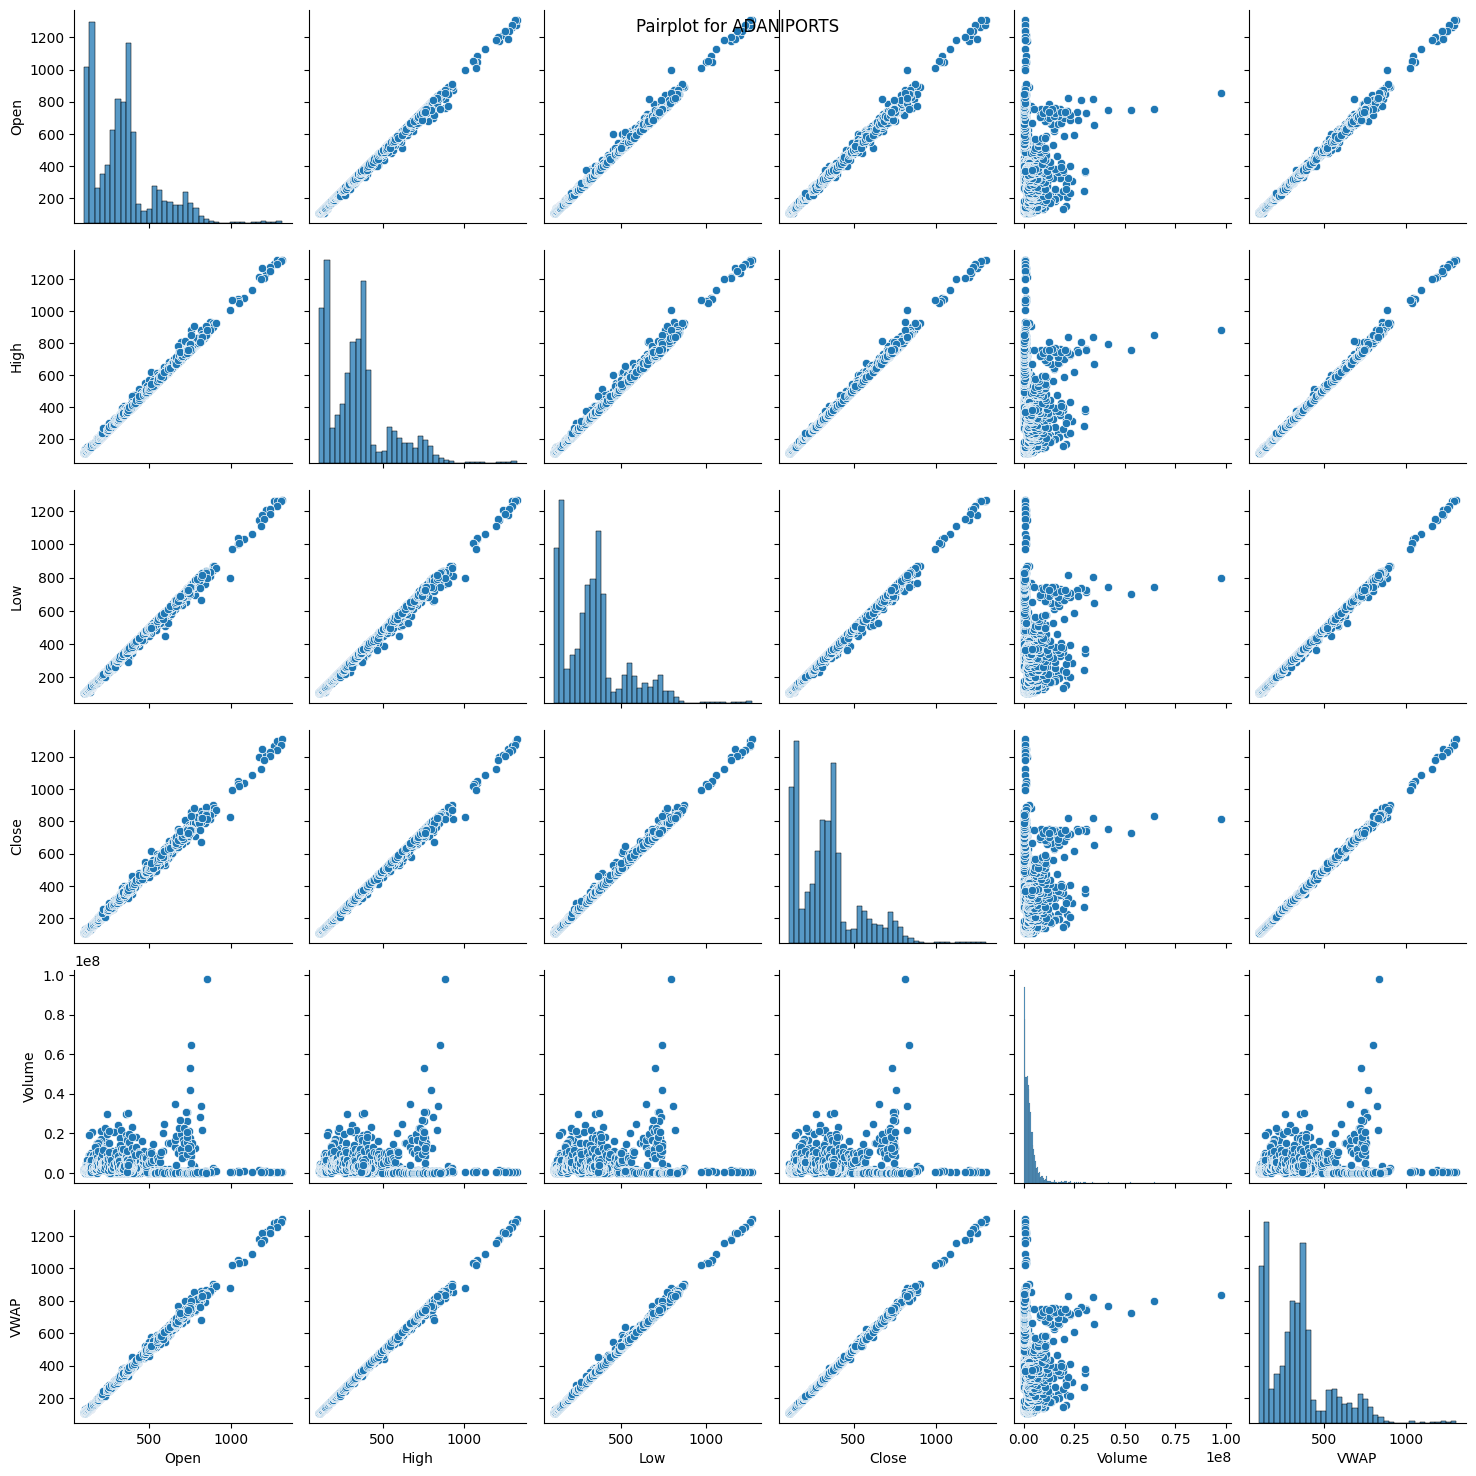

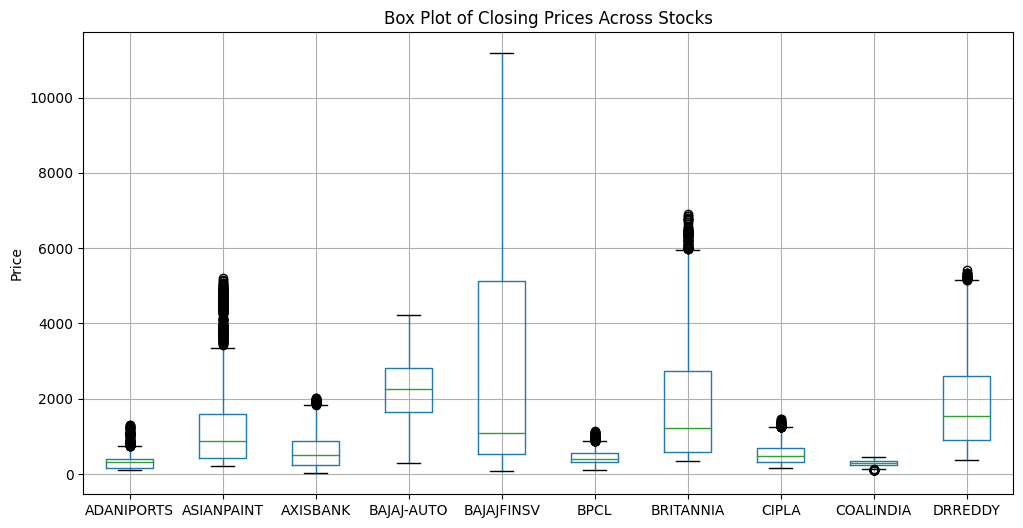


Missing Values in ADANIPORTS.csv:
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
Daily_Return            1
Volatility             19
dtype: int64

Missing Values in ASIANPAINT.csv:
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

Missing Values in AXISBANK.csv:
Symbol                   0
Series                   0
Prev Close             

<Figure size 1200x600 with 0 Axes>

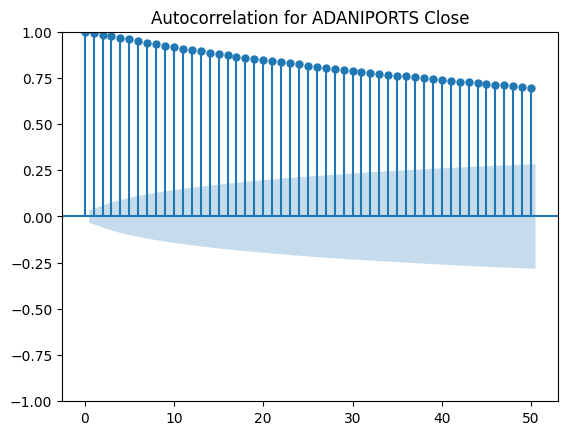

ADF Statistic: -4.777085111301348
p-value: 6.0149572107930606e-05
Critical Values: {'1%': -3.432334353260866, '5%': -2.8624167700089744, '10%': -2.5672367227799637}


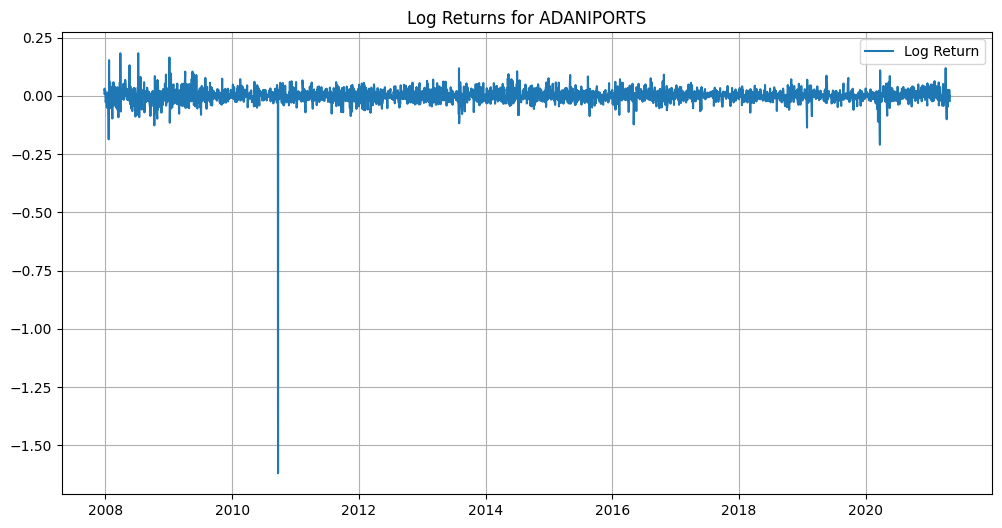

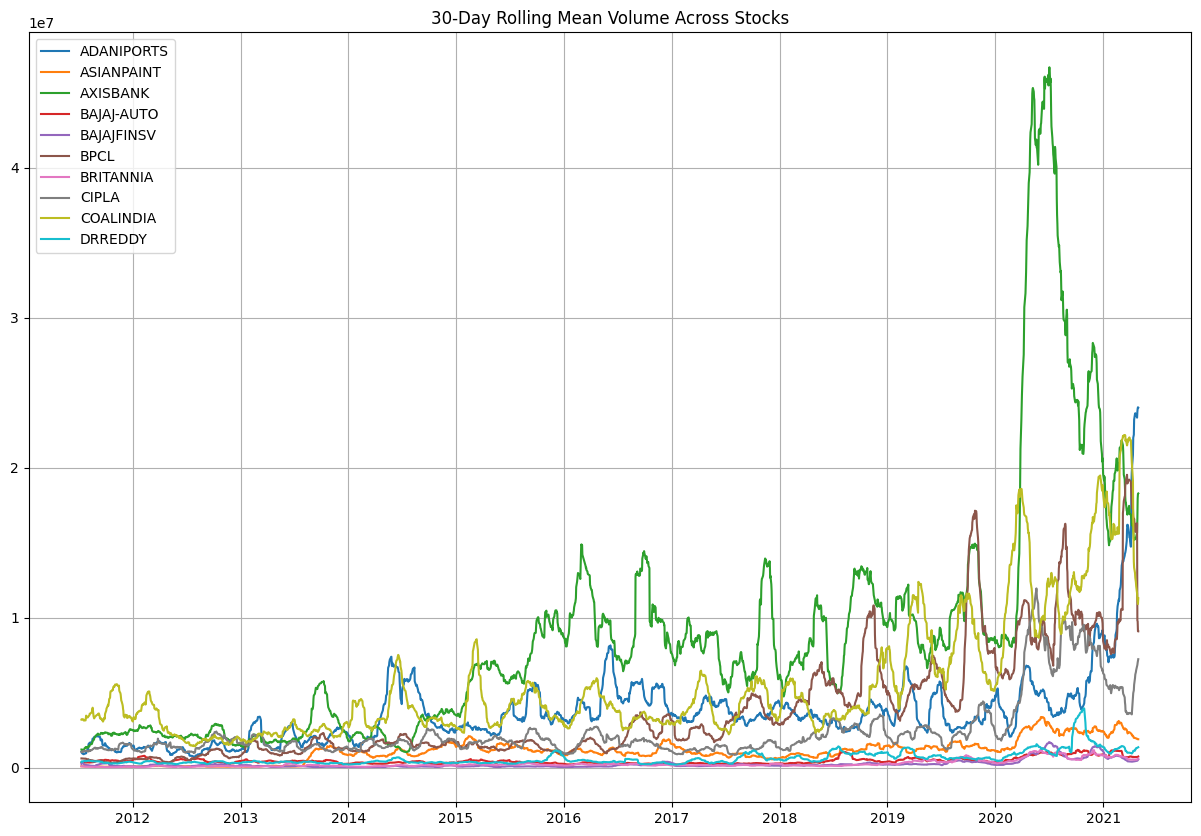

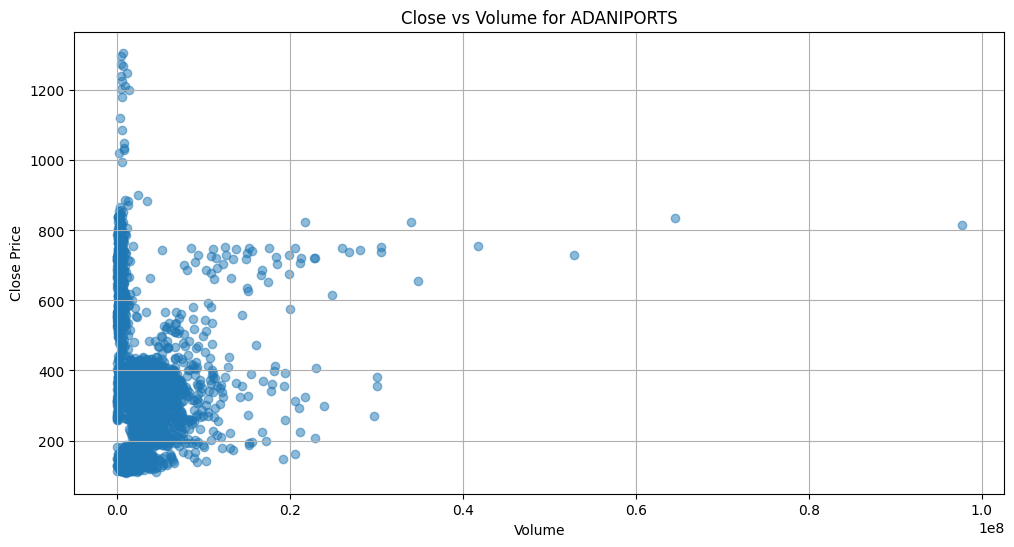

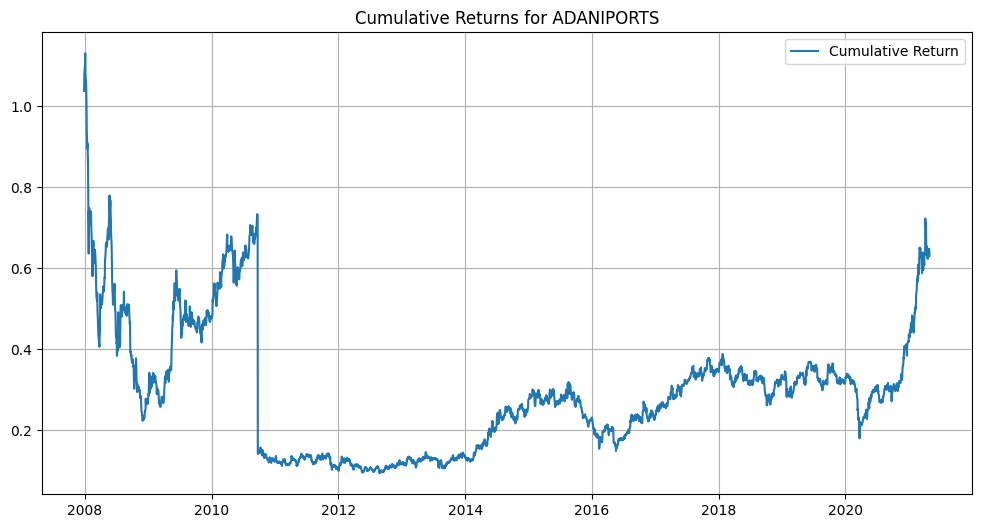

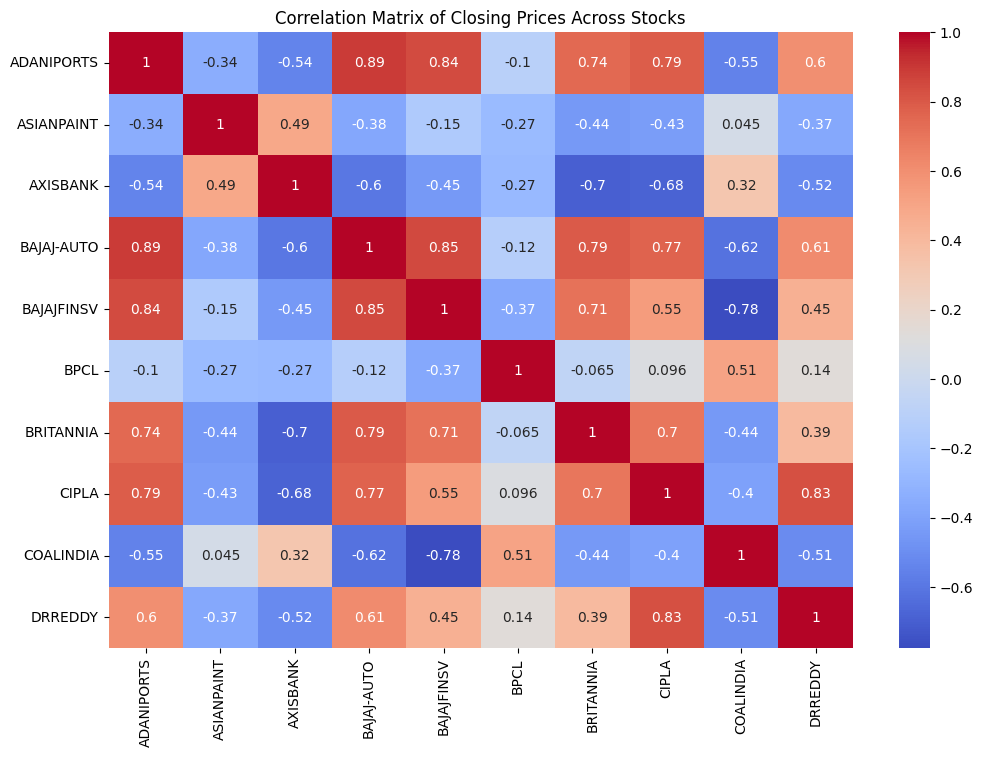

EDA results saved for all stocks.


In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Cell 2: Define Stock List for Analysis
stocks = ["ADANIPORTS.csv", "ASIANPAINT.csv", "AXISBANK.csv", "BAJAJ-AUTO.csv", 
          "BAJAJFINSV.csv", "BPCL.csv", "BRITANNIA.csv", "CIPLA.csv", 
          "COALINDIA.csv", "DRREDDY.csv"]
data_dir = "../data/"

# Cell 3: Load Data Function
def load_stock_data(stock_file, data_dir="../data/"):
    file_path = os.path.join(data_dir, stock_file)
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return None
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Cell 4: Load All Stocks into a Dictionary
data_dict = {stock: load_stock_data(stock) for stock in stocks}
for stock, df in data_dict.items():
    if df is not None:
        df.set_index('Date', inplace=True)

# Cell 5: Check Loaded Data
for stock, df in data_dict.items():
    if df is not None:
        print(f"{stock} - Rows: {len(df)}, Columns: {df.columns.tolist()}")

# Cell 6: Summary Statistics for All Stocks
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nSummary Statistics for {stock}:")
        print(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].describe())

# Cell 7: Plot Closing Prices for All Stocks
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Close'], label=stock.replace('.csv', ''))
plt.title('Closing Prices for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Cell 8: Plot Trading Volume for All Stocks
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Volume'], label=stock.replace('.csv', ''))
plt.title('Trading Volume for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

# Cell 9: Rolling Mean and Standard Deviation for ADANIPORTS
df = data_dict['ADANIPORTS.csv']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Close'].rolling(window=20).mean(), label='20-Day MA')
# Initialize Volatility after the first 19 rows to avoid NaN
volatility = df['Close'].rolling(window=20).std().iloc[19:]
plt.plot(df.index[19:], volatility, label='20-Day Std')
plt.title('Rolling Stats for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 10: Seasonal Decomposition for ADANIPORTS
result = seasonal_decompose(df['Close'], model='additive', period=252)
result.plot()
plt.suptitle('Seasonal Decomposition for ADANIPORTS')
plt.show()

# Cell 11: Daily Returns for ADANIPORTS
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='green')
plt.title('Distribution of Daily Returns for ADANIPORTS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Cell 12: Volatility (Rolling Standard Deviation) for ADANIPORTS
df['Volatility'] = df['Close'].rolling(window=20).std()
# Drop the first 19 rows where Volatility is NaN
df = df.iloc[19:].copy()  # Use copy to avoid SettingWithCopyWarning
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='20-Day Volatility')
plt.title('Volatility for ADANIPORTS')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

# Cell 13: Correlation Heatmap for ADANIPORTS
plt.figure(figsize=(10, 8))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for ADANIPORTS')
plt.show()

# Cell 14: Pairplot for ADANIPORTS
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].dropna())
plt.suptitle('Pairplot for ADANIPORTS')
plt.show()

# Cell 15: Box Plot of Closing Prices Across Stocks
# Use a different loop variable to avoid overwriting df
closing_prices = pd.DataFrame({stock.replace('.csv', ''): stock_df['Close'] for stock, stock_df in data_dict.items() if stock_df is not None})
plt.figure(figsize=(12, 6))
closing_prices.boxplot()
plt.title('Box Plot of Closing Prices Across Stocks')
plt.ylabel('Price')
plt.show()

# Cell 16: Check for Missing Values
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        print(f"\nMissing Values in {stock}:")
        print(stock_df.isnull().sum())

# Cell 17: Fill or Drop Missing Values (if any)
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        # Fill forward and then drop any remaining NaNs
        stock_df.fillna(method='ffill', inplace=True)
        stock_df.dropna(inplace=True)
        print(f"{stock} - Rows after cleaning: {len(stock_df)}")

# Cell 18: Autocorrelation Plot for ADANIPORTS Close
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df['Close'].dropna(), lags=50)
plt.title('Autocorrelation for ADANIPORTS Close')
plt.show()

# Cell 19: Stationarity Test (ADF Test) for ADANIPORTS
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Cell 20: Log Returns for ADANIPORTS
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
# Use index aligned with Log_Return (drop first row)
plt.figure(figsize=(12, 6))
plt.plot(df.index[1:], df['Log_Return'].dropna(), label='Log Return')
plt.title('Log Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 21: Compare Volume Trends Across Stocks
plt.figure(figsize=(15, 10))
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        plt.plot(stock_df.index, stock_df['Volume'].rolling(window=30).mean(), label=stock.replace('.csv', ''))
plt.title('30-Day Rolling Mean Volume Across Stocks')
plt.legend()
plt.grid()
plt.show()

# Cell 22: Scatter Plot of Close vs Volume for ADANIPORTS
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Close vs Volume for ADANIPORTS')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# Cell 23: Cumulative Returns for ADANIPORTS
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

# Cell 24: Correlation Matrix Across All Stocks
close_prices = pd.DataFrame({stock.replace('.csv', ''): stock_df['Close'] for stock, stock_df in data_dict.items() if stock_df is not None})
plt.figure(figsize=(12, 8))
sns.heatmap(close_prices.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Closing Prices Across Stocks')
plt.show()

# Cell 25: Save EDA Results
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        stock_df.to_csv(f"../data/eda_{stock}")
print("EDA results saved for all stocks.")